# In-N-Out Yelp Sentiment Analysis

### Introduction
Yelp reviews provide valuable insights into customer sentiment regarding various aspects of their dining experience (service, food, ambiance). This project investigates whether the experience varies significantly between In-N-Out locations, as well as being able to categorize reviews and future reviews as positive or negative.

* **Objective**: The primary goal of this project was to analyze Yelp reviews for multiple In-N-Out locations to detect potential differences between them using sentiment analysis, focusing on understanding overall customer satisfaction and predicting future reviews' sentiment.

 
### Hypotheses:
* **Hypothesis**: There are signficant sentiment differences across In-N-Out locations, with some performing better in terms of service and cleanliness than others.
* **Hypothesis**: Customer sentiment likely declined toward the end of 2020 and into 2021, potentially due to the impact of the COVID-19 pandemic.

### Data Collection:
* **Source**: Data was collected using the Yelp API, including reviews from multiple In-N-Out locations, with fields such as review text, date, rating, and reviewer details.
* **Scraping**: BeautifulSoup was used to scrape additional review data, ensuring that all reviews for each location were gathered.

In [1]:
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
import os
import matplotlib.pyplot as plt

C:\Users\Patrick\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Patrick\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Patrick\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
client_id = os.environ.get('CLIENT_ID')
api_key = os.environ.get('API_KEY')

In [3]:
from yelpapi import YelpAPI
yelp_api = YelpAPI(api_key)

In [4]:
headers = {
    "Authorization": f"Bearer {api_key}"
}
params = {
    "term": 'In-N-Out',
    "location": 'Cerritos, CA',
    "limit": 50
}

response = requests.get("https://api.yelp.com/v3/businesses/search", headers=headers, params=params)

In [5]:
data = json.loads(response.text)
businesses = data["businesses"]

In [38]:
cols = list(businesses[0].keys())
data = pd.DataFrame(columns=cols)

for biz in businesses:
    data = data.append(biz, ignore_index=True)

In [42]:
filtered_df = data[data['name'] == 'In-N-Out Burger'].copy()
filtered_df.loc[:, 'location'] = filtered_df['alias'].apply(lambda x: '-'.join(x.split('-')[4:]))
filtered_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,jvqIT26eqoy0MKHTlJeKPg,in-n-out-burger-cerritos,In-N-Out Burger,https://s3-media2.fl.yelpcdn.com/bphoto/9Wv2ro...,False,https://www.yelp.com/biz/in-n-out-burger-cerri...,249,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.7,"{'latitude': 33.8871791, 'longitude': -118.101...",[],$,cerritos,+18007861000,(800) 786-1000,3879.021810
1,4k5O_JWomW-OVbNM53ETVA,in-n-out-burger-buena-park,In-N-Out Burger,https://s3-media2.fl.yelpcdn.com/bphoto/MTTywq...,False,https://www.yelp.com/biz/in-n-out-burger-buena...,450,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.9,"{'latitude': 33.8473088, 'longitude': -118.028...",[],$,buena-park,+18007861000,(800) 786-1000,4263.317269
2,tyn8d_6PjJuQB8SJoXyiQQ,in-n-out-burger-la-mirada,In-N-Out Burger,https://s3-media2.fl.yelpcdn.com/bphoto/ES5HdM...,False,https://www.yelp.com/biz/in-n-out-burger-la-mi...,329,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",4.2,"{'latitude': 33.8825721740723, 'longitude': -1...",[],$$,la-mirada,+18007861000,(800) 786-1000,4489.894960
3,MYrpKWjk2vgtIJ6TPnztEw,in-n-out-burger-bellflower,In-N-Out Burger,https://s3-media4.fl.yelpcdn.com/bphoto/LFRyy7...,False,https://www.yelp.com/biz/in-n-out-burger-bellf...,135,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",3.4,"{'latitude': 33.8751, 'longitude': -118.12539}",[],$,bellflower,+18007861000,(800) 786-1000,5340.807017
4,ey6y0FjWuRGUP203PcZkXg,in-n-out-burger-lakewood,In-N-Out Burger,https://s3-media4.fl.yelpcdn.com/bphoto/LmoC13...,False,https://www.yelp.com/biz/in-n-out-burger-lakew...,316,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.1,"{'latitude': 33.861028, 'longitude': -118.124673}",[],$$,lakewood,+18007861000,(800) 786-1000,5193.091386
5,22iH2uAN3qMgYy8U05seTA,in-n-out-burger-long-beach,In-N-Out Burger,https://s3-media2.fl.yelpcdn.com/bphoto/zOvOkC...,False,https://www.yelp.com/biz/in-n-out-burger-long-...,354,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",4.1,"{'latitude': 33.831071, 'longitude': -118.084846}",[],$,long-beach,+18007861000,(800) 786-1000,4114.694139
6,m4-UF_JqTZcn8rJLvGhIow,in-n-out-burger-signal-hill,In-N-Out Burger,https://s3-media3.fl.yelpcdn.com/bphoto/cRMHoX...,False,https://www.yelp.com/biz/in-n-out-burger-signa...,486,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",4.1,"{'latitude': 33.8120634, 'longitude': -118.183...",[],$,signal-hill,+18007861000,(800) 786-1000,12145.774967
7,gETaNOUcYoS03E_gIjdMNA,in-n-out-burger-norwalk,In-N-Out Burger,https://s3-media2.fl.yelpcdn.com/bphoto/rpFAQ2...,False,https://www.yelp.com/biz/in-n-out-burger-norwa...,230,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.4,"{'latitude': 33.901222, 'longitude': -118.0823...",[],$,norwalk,+18007861000,(800) 786-1000,4160.452196
8,5p-067ViGXujqgmleDR-mA,in-n-out-burger-anaheim,In-N-Out Burger,https://s3-media4.fl.yelpcdn.com/bphoto/ZQ6VEO...,False,https://www.yelp.com/biz/in-n-out-burger-anahe...,464,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.6,"{'latitude': 33.8248573, 'longitude': -117.958...",[],$,anaheim,+18007861000,(800) 786-1000,11137.000461
9,IUcRMb8OXKFyt1zxcDL3uQ,in-n-out-burger-long-beach-2,In-N-Out Burger,https://s3-media1.fl.yelpcdn.com/bphoto/TMFEQ3...,False,https://www.yelp.com/biz/in-n-out-burger-long-...,495,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",4.1,"{'latitude': 33.7911956966296, 'longitude': -1...",[],$$,long-beach-2,+18007861000,(800) 786-1000,10579.256210


In [8]:
filtered_df['url'][0]

'https://www.yelp.com/biz/in-n-out-burger-cerritos?adjust_creative=aLmjxIidygN62xkbHFc5eA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=aLmjxIidygN62xkbHFc5eA'

In [68]:
data = []
headers = {
    "Authorization": f"Bearer {api_key}"
}
for index, row in filtered_df.iterrows():
    url = row['url']
    location = row['location']
    new_page = "&start={}"
    response = requests.get(url, headers=headers)
    content = response.content
    soup = BeautifulSoup(content, "html.parser")

    max_page = 1
    pages = soup.find('div', attrs={'aria-label': "Pagination navigation"})
    if pages:
        number_of_pages = pages.find('div', class_="y-css-1iy1dwt")
        if number_of_pages:
            text_content = number_of_pages.getText()
            max_page = text_content[-1]
        else:
            print("Inner element not found.")
    else:
        print("Outer element not found.")
    total_reviews = int(max_page) * 10

    for i in range(0, total_reviews, 10):
        new_page_url = url + new_page.format(i)
        new_response = requests.get(new_page_url, headers=headers)
        new_content = new_response.content
        new_soup = BeautifulSoup(new_content, "html.parser")

        li = new_soup.find_all('li', class_="y-css-1jp2syp")
        for review in li:
            row_data = []
            rating = review.find('span', class_="y-css-pw0opj")
            if rating is None:
                continue
            num_of_stars = rating.find('div', class_="y-css-9tnml4")["aria-label"].split()[0]
            date = review.find('span', class_="y-css-wfbtsu")
            description = review.find('span', class_="raw__09f24__T4Ezm")
            row_data.append(date.getText())
            row_data.append(num_of_stars)
            row_data.append(description.getText())
            row_data.append(location)
            data.append(row_data)

In [72]:
df = pd.DataFrame(data, columns =["date", "rating", "reviews", "location"])
df['rating'] = df['rating'].astype(float).round().astype(int)

In [73]:
df

,date,rating,reviews,location
0,"Jun 1, 2024",5,"06/01/2024, I like to give this particular In ...",cerritos
1,"May 28, 2024",4,"tl,dr: convenient stop for some fast food on t...",cerritos
2,"Aug 27, 2024",4,Service was great and fast. Food was made ac...,cerritos
3,"Aug 14, 2024",4,The burgers are always good here. What are you...,cerritos
4,"Oct 2, 2023",3,In and out is in and out. Burgers and drinks a...,cerritos
...,...,...,...,...
1425,"Mar 31, 2020",5,Every single time i go here its a 5/5 experien...,santa-fe-springs
1426,"Apr 4, 2016",5,What can I say...team animal style all they wa...,santa-fe-springs
1427,"Oct 15, 2018",5,"Taste = 5 Service = 5 Burger was perfect, just...",santa-fe-springs
1428,"May 18, 2015",5,"""In n outttt...that's what a hamburgers... all...",santa-fe-springs


In [74]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [142]:
filtered_df = df[df.index >= '2012-01-01']

In [146]:
from langdetect import detect_langs

language = [detect_langs(i) for i in filtered_df['reviews']]
languages = [str(i[0]).split(':')[0] for i in language]
filtered_df.loc[:, 'language'] = languages

In [147]:
filtered_df['language'].value_counts()

en    1425
Name: language, dtype: int64

### Data Preparation and Integrity

*Ensure that the data was properly cleaned and processed.*

   * **Tokenization**: Breaking text into words or phrases
   * **Lemmatization**: Converting words to their base form
   * **Removing Stop Words**: Filtering out common, non-informative words such as "and" or "the"

In [78]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patrick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['super', 'duper', 'place'])

In [80]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist

full_text = ' '.join(filted_df['reviews'])
lower_full_text = full_text.lower()
word_tokens = word_tokenize(lower_full_text)

tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)

token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])
dist = dist.iloc[::-1]

In [81]:
from nltk.tokenize import sent_tokenize
import re

good_df = filtered_df[filtered_df['rating'].isin([4,5])]

good_reviews = ' '.join(good_df.reviews)

#split long string into sentences
sentences_good = sent_tokenize(good_reviews)

good_token_clean = list()

#get tokens for each sentence
for sentence in sentences_good:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

In [82]:
print(sentences_good[:3])

['06/01/2024, I like to give this particular In and Out location a 10 star rating to this being the very first location of all the In and Out restaurants that I have ever been to in Southern California and/or Las Vegas Nevada this has actually the first black employee that I have seen.', 'Congratulations In and Out for hiring what appears to me to be your very first black employee, or someone who is actually not a light skinned black  employee.', 'A black male at that.Good to see In and Out is finally diversifying with at least one black employee.']


In [83]:
print(good_token_clean[:3])

[['like', 'particular', 'location', 'star', 'rating', 'location', 'restaurants', 'southern', 'california', 'las', 'vegas', 'nevada', 'actually', 'black', 'employee', 'seen'], ['congratulations', 'hiring', 'appears', 'black', 'employee', 'actually', 'light', 'skinned', 'black', 'employee'], ['black', 'male', 'good', 'finally', 'diversifying', 'black', 'employee']]


<a id="section-1"></a>
### Data Visualization

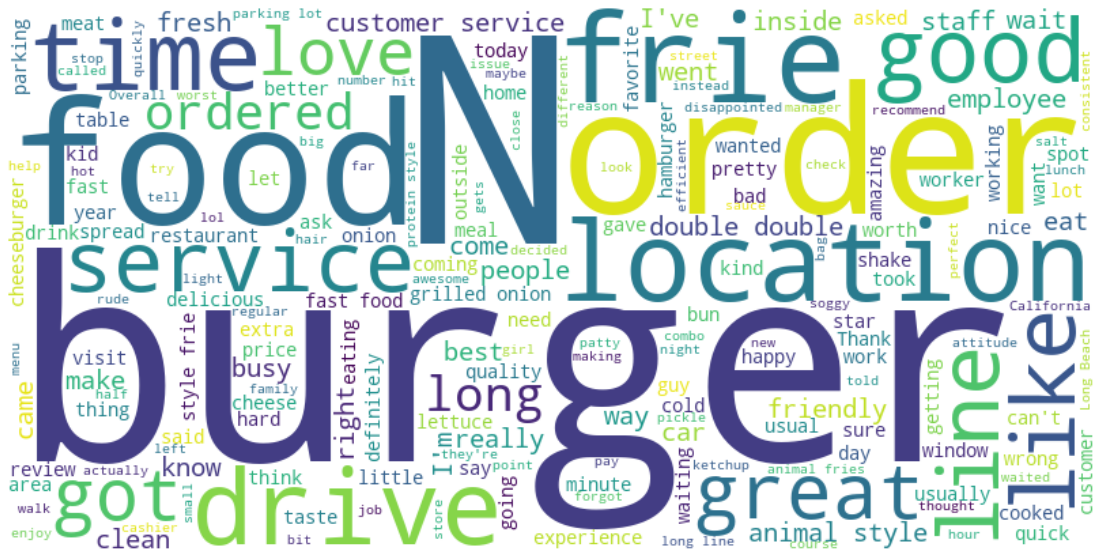

In [84]:
from wordcloud import WordCloud
cloud_no_stopword = WordCloud(width=800, height=400, background_color='white', stopwords=my_stop_words).generate(full_text)
plt.figure(figsize=(20,10))
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

1. Word cloud of popular words
    - Purpose: The word cloud visualizes the most frequently mentioned words in the Yelp reviews, with larger words representing higher frequency.
    - Insight: This highlights the key themes and topics customers discuss most often in their reviews. Common words like "burger", "fries", or "food" might appear prominently, giving an immediate sense of what aspects of the restaurant experience are most frequently commented on. This is a quick way to identify both positive and negative themes without diving into detailed text analysis.

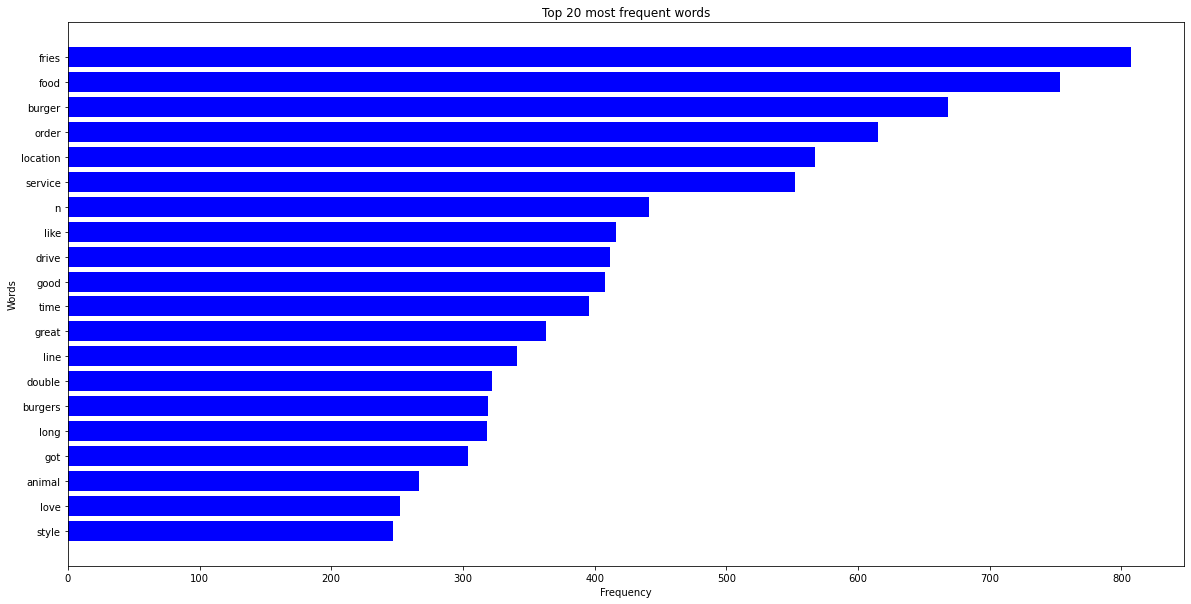

In [85]:
plt.figure(figsize=(20,10))
plt.barh(dist['Word'], dist['Frequency'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most frequent words')
plt.show()

2. Top 20 most frequent words
    - Purpose: This horizontal bar chart shows the top 20 most frequently used words in the reviews.
    - Insight: This visualization allows for a more precise look at word frequency compared to the word cloud. By quantifying how often certain words are used, it is possible to identify the most common topics or aspects of customer experience being discussed. This bar chart provides a clearer numeric context for the data, making it easier to track the relative importance of each word.

In [86]:
#N-grams
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))

bigrams = vect.fit_transform(df['reviews'])
bigram_df=pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())

bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()

bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)

bigram_frequency = bigram_frequency.iloc[::-1]

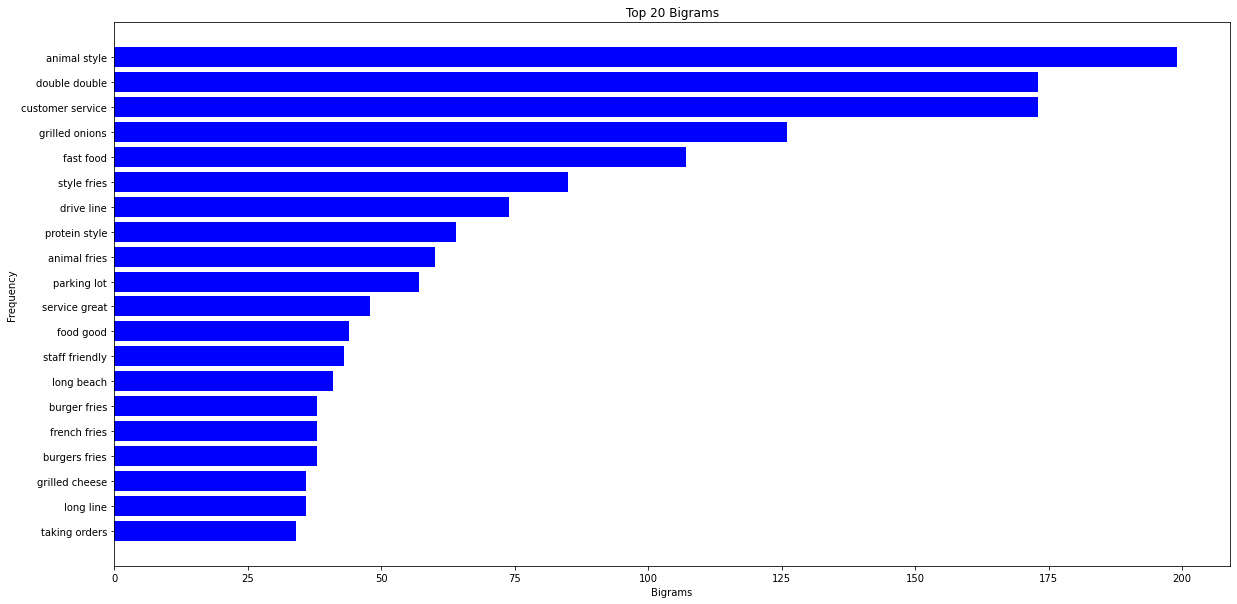

In [87]:
plt.figure(figsize=(20,10))
plt.barh(bigram_frequency['bigram'], bigram_frequency['frequency'], color='blue')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 20 Bigrams')
plt.show()

3. Top 20 bigrams
    - Purpose: This bar chart shows the 20 most common bigrams found in the reviews.
    - Insight: Bigrams provide more context compared to single words, revealing specific phrases that customers use. For example, bigrams like "animal style" or "customer service" give more insight into how customers describe their experience. This helps with sentiment analysis by showing common descriptions that directly relate to customer satisfaction or dissatisfaction. It's useful for understanding what aspects are being discussed together and what customers emphasize in their reviews.

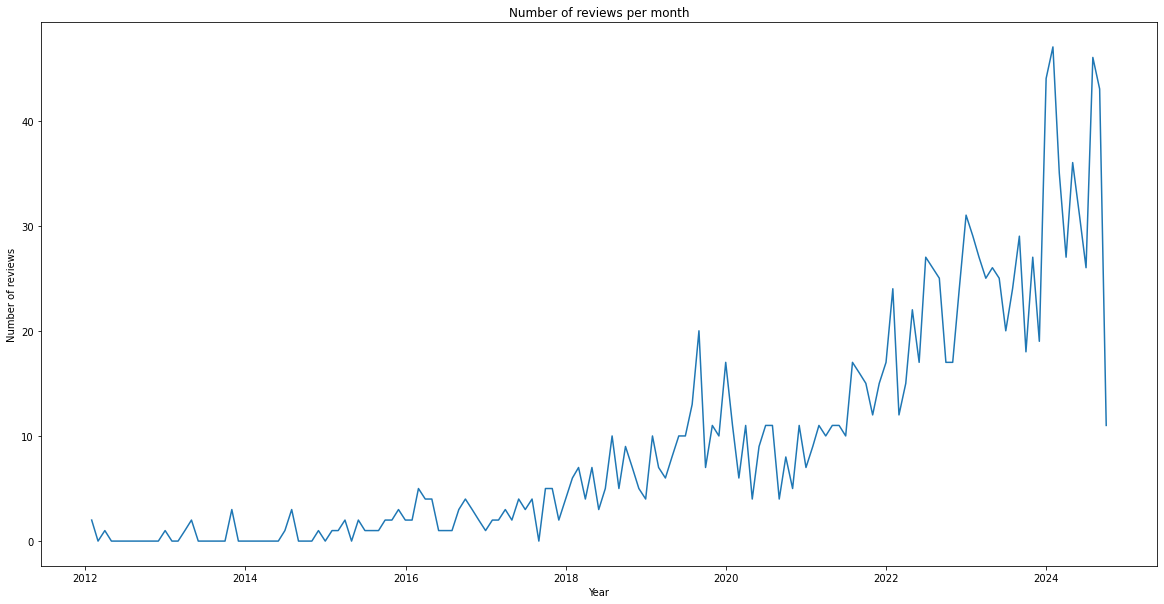

In [88]:
plt.figure(figsize=(20,10))
plt.plot(filtered_df['reviews'].resample('M').count())
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per month')
plt.show()

4. Number of reviews per month
    - Purpose: This line plot shows how the number of Yelp reviews changes over time, broken down by month
    - Insight: The graph reveals a steady increase in the number of reviews per month, with a notable dip toward the end of 2020 extending through 2023. A spike in reviews occurs at the beginning of 2024. This descrease in reviews aligns with the COVID-19 pandemic, likely because fewer people were dining out, leading to fewer reviews during that period.

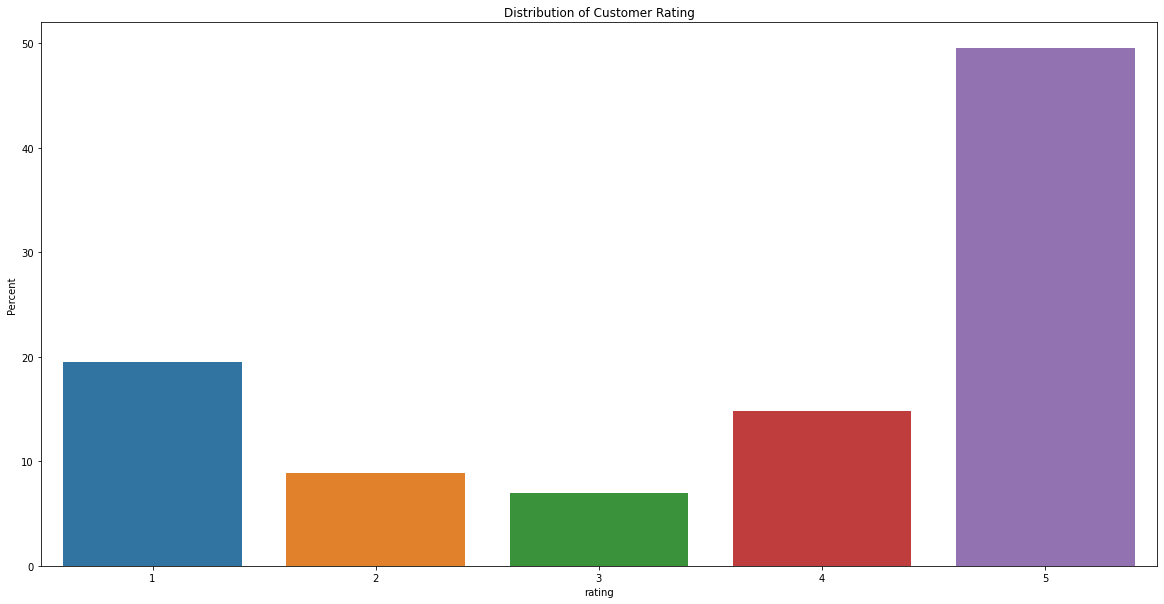

In [89]:
import seaborn as sns

plt.figure(figsize=(20,10))
ax = sns.barplot(data=filtered_df, x='rating', y='rating', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

5. Distribution of customer ratings
    - Purpose: This bar plot shows the distribution of customer ratings, with each rating represented as a percentage of the total number of reviews.
    - Insight: The distribution shows that customer ratings are skewed toward the positive end. Over 50% of the reviews have a 5-star rating, indicating high overall customer satisfaction.

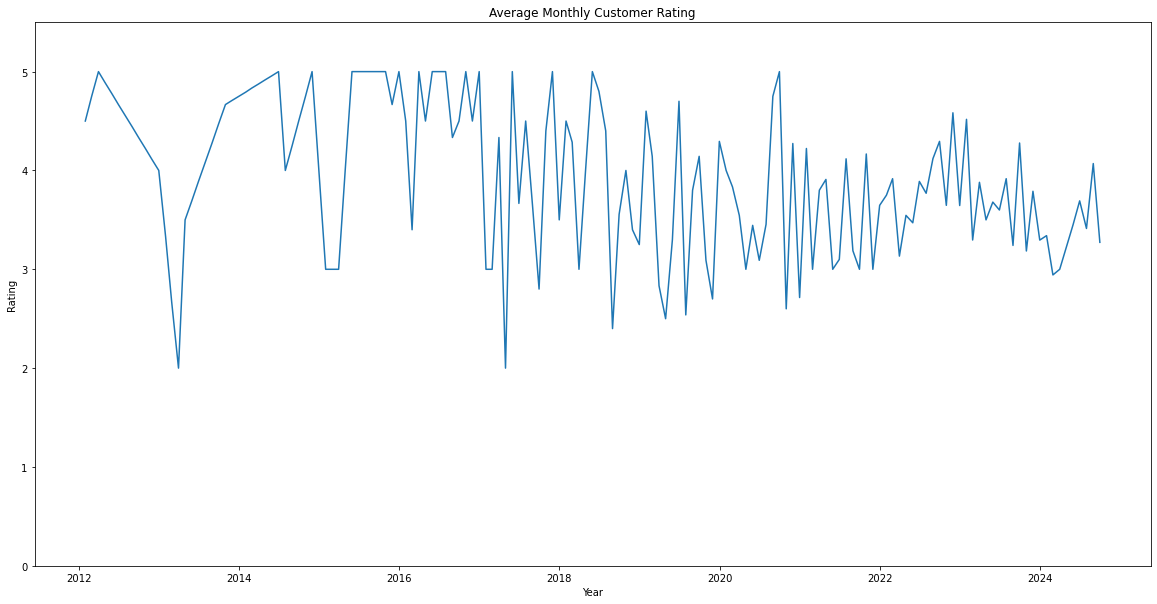

In [90]:
# Resample and interpolate missing values
resampled_df = filtered_df['rating'].resample('M').mean().interpolate()

plt.figure(figsize=(20,10))
plt.plot(resampled_df)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Monthly Customer Rating')
plt.ylim(0,5.5)
plt.show()

6. Average monthly customer rating
    - Purpose: This line plot shows the average rating given by customers each month.
    - Insight: The average rating generally stays between 3 and 4, indicating stable customer satisfaction over time. However, there is a significant drop in 2021, where the average rating falls below 3. This could correspond with the start of the COVID-19 pandemic, suggesting that service or food quality may have declined during that time. The average rating recovered within a year, indicating a quick rebound in customer satisfaction.

In order to see words that often appear in similar contexts, the Word2Vec model from the Gensim library is used to learn word embeddings based on the Yelp reviews.

In [148]:
from gensim.models import Word2Vec

model_ted = Word2Vec(sentences=good_token_clean, vector_size=500, window=10, min_count=1, workers=4, sg=0)
similar_words = model_ted.wv.most_similar('service', topn=10)

print(similar_words)

[('in-n-out', 0.9999132752418518), ('food', 0.9999129772186279), ('location', 0.9999071359634399), ('like', 0.9999028444290161), ('order', 0.9999005794525146), ('drive', 0.9998974800109863), ('nice', 0.9998958706855774), ('n', 0.9998956918716431), ('time', 0.9998947978019714), ('fast', 0.9998944401741028)]


### Sentiment Analysis
In order to perform sentiment analysis on the reviews VADER is implemented to calculate sentiment scores (positive, negative, neutral, and compound). Thes sentiment scores are averaged over each month to generate a time series of average monthly sentiment and missing values are filled with the overall mean sentiment.

In [149]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Patrick\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [150]:
sid = SentimentIntensityAnalyzer()

sentiment_scores = filtered_df['reviews'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])

monthly_sentiment = sentiment.resample('M').mean()
mean_sentiment = monthly_sentiment.mean()
monthly_sentiment = monthly_sentiment.fillna(mean_sentiment)
filtered_sentiment = monthly_sentiment['2012':'2024']

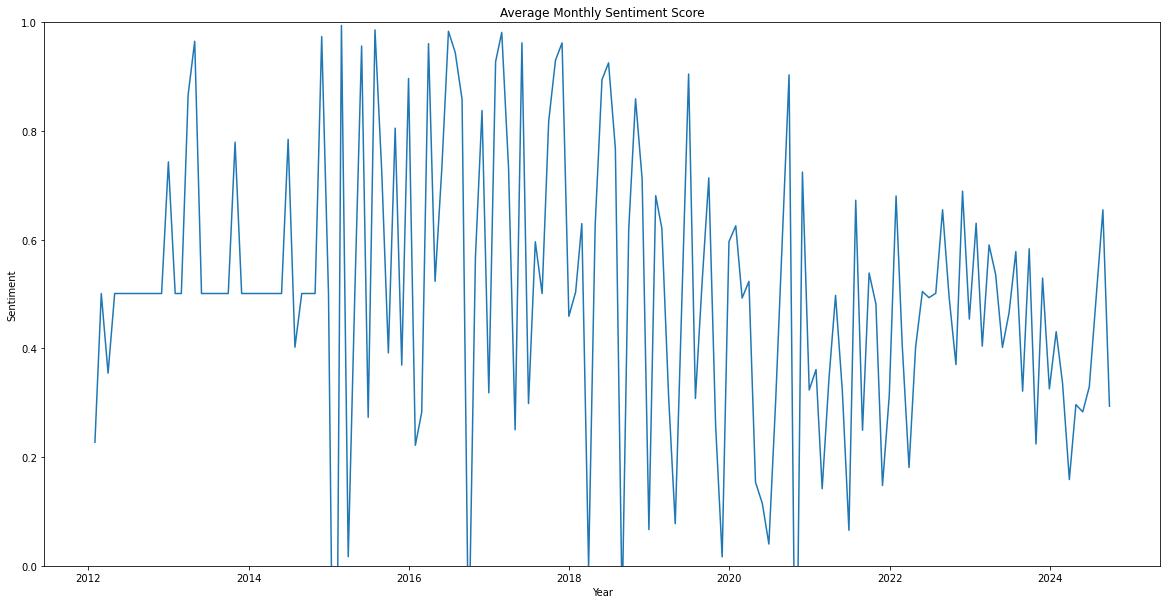

In [151]:
plt.figure(figsize=(20,10))
plt.plot(filtered_sentiment)
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.title('Average Monthly Sentiment Score')
plt.ylim(0,1)
plt.show()

This plot displays how the overall sentiment of reviews changes over time, potentially showing trends like drops in sentiment during the pandemic.

In [95]:
filtered_df['label'] = filtered_df['rating'].apply(lambda x: 1 if x >= 3 else 0)

<ipython-input-95-f76ec55148df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['label'] = df_filtered['rating'].apply(lambda x: 1 if x >= 3 else 0)


In [96]:
filtered_df['label'].value_counts()

1    1019
0     406
Name: label, dtype: int64

#### Sentiments from each location

In [118]:
location_df = filtered_df.copy()

location_df.loc[:, 'sentiment_scores'] = location_df['reviews'].apply(lambda x: sid.polarity_scores(x))
location_df.loc[:, 'compound_score'] = location_df['sentiment_scores'].apply(lambda x: x['compound'])

# Group by location and calculate the average compound score
average_sentiment_by_location = location_df.groupby('location')['compound_score'].mean().reset_index()

# Rename columns for clarity
average_sentiment_by_location.columns = ['Location', 'Average_Compound_Score']

# Print the results
print(average_sentiment_by_location)

            Location  Average_Compound_Score
0            anaheim                0.385468
1          anaheim-5                0.556192
2         bellflower                0.476281
3         buena-park                0.469427
4           cerritos                0.548037
5             downey                0.446522
6          la-mirada                0.554561
7           lakewood                0.168965
8         long-beach                0.497402
9       long-beach-2                0.541847
10      long-beach-4                0.605051
11           norwalk                0.177091
12  santa-fe-springs                0.313865
13        seal-beach                0.433378
14       signal-hill                0.642218
15       westminster                0.441634


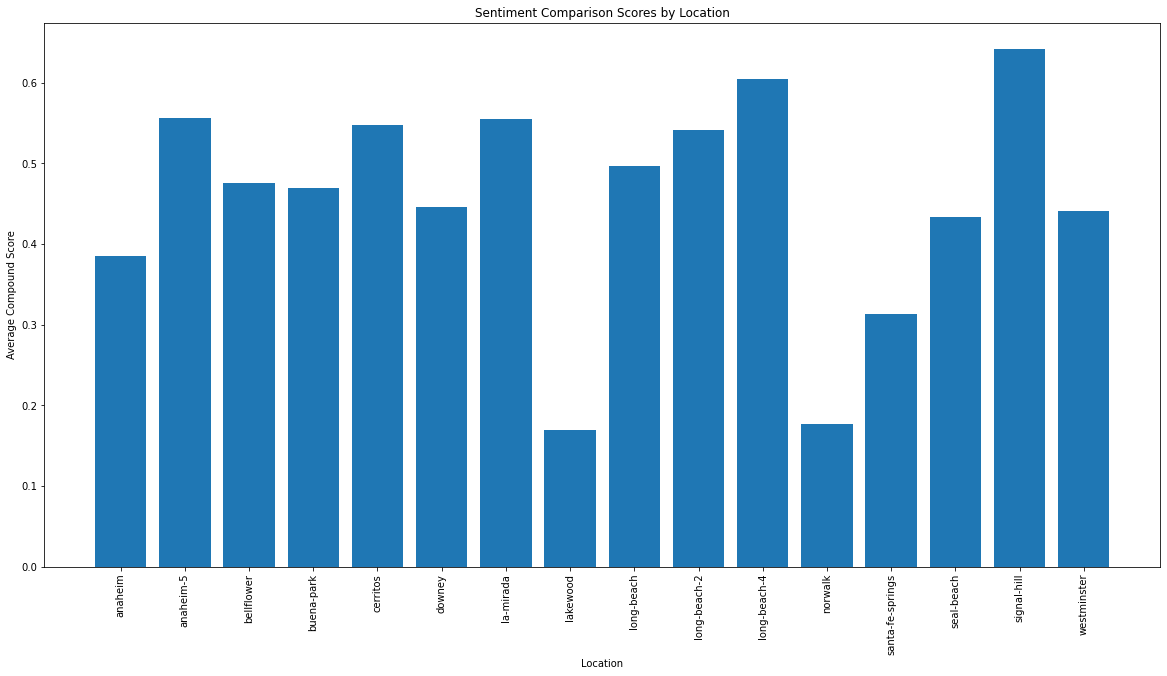

In [120]:
plt.figure(figsize=(20,10))
plt.bar(average_sentiment_by_location['Location'], average_sentiment_by_location['Average_Compound_Score'])
plt.xlabel('Location')
plt.ylabel('Average Compound Score')
plt.title('Sentiment Comparison Scores by Location')
plt.xticks(rotation=90)
plt.show()

This bar plot illustrates the sentiment scores across various In-N-Out locations. The majority of locations exhibit an overall positive sentiment, with compound scores consistently above 0.4, indicating favorable customer experiences. However, a few locations stand out with compound scores below 0.4, suggesting that these business may face specific issues. These lower scores could be related to factors such as service quality or operational inconsistencies. Addressing the concerns at these outlier locations may help align their customer sentiment with the generally positive trend observed across most locations.

In [137]:
selected_locations = ['norwalk', 'lakewood']
selected_df = filtered_df[filtered_df['location'].isin(selected_locations)]

text_corpus = ' '.join(selected_df['reviews'].astype(str))

sid = SentimentIntensityAnalyzer()

words = word_tokenize(text_corpus.lower())
stop_words = set(stopwords.words('english'))

cleaned_words = [word for word in words if word.isalpha() and word not in stop_words]

vectorizer = CountVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform([' '.join(cleaned_words)])
bigrams = vectorizer.get_feature_names()
bigram_counts = X.toarray().flatten()

bigram_df = pd.DataFrame({'Bigram': bigrams, 'Count': bigram_counts})

bigram_sentiments = {}
for bigram in bigrams:
    sentiment_score = sid.polarity_scores(bigram)['compound']
    bigram_sentiments[bigram] = sentiment_score

negative_bigram_df = bigram_df.copy()
negative_bigram_df['Score'] = negative_bigram_df['Bigram'].map(bigram_sentiments)
negative_bigram_df = negative_bigram_df[negative_bigram_df['Score'] < 0]

top_negative_bigrams = negative_bigram_df.sort_values(by='Count', ascending=False).head(20)

In [138]:
top_negative_bigrams

,Bigram,Count,Score
3653,order wrong,5,-0.4767
2117,go wrong,5,-0.4767
2439,horrible service,5,-0.5423
853,chocolate shake,4,-0.1779
1888,fries hard,3,-0.1027
5698,worst ever,3,-0.6249
5751,wrong order,3,-0.4767
346,bad service,3,-0.5423
1087,crushed ice,2,-0.4215
3181,messed order,2,-0.3400


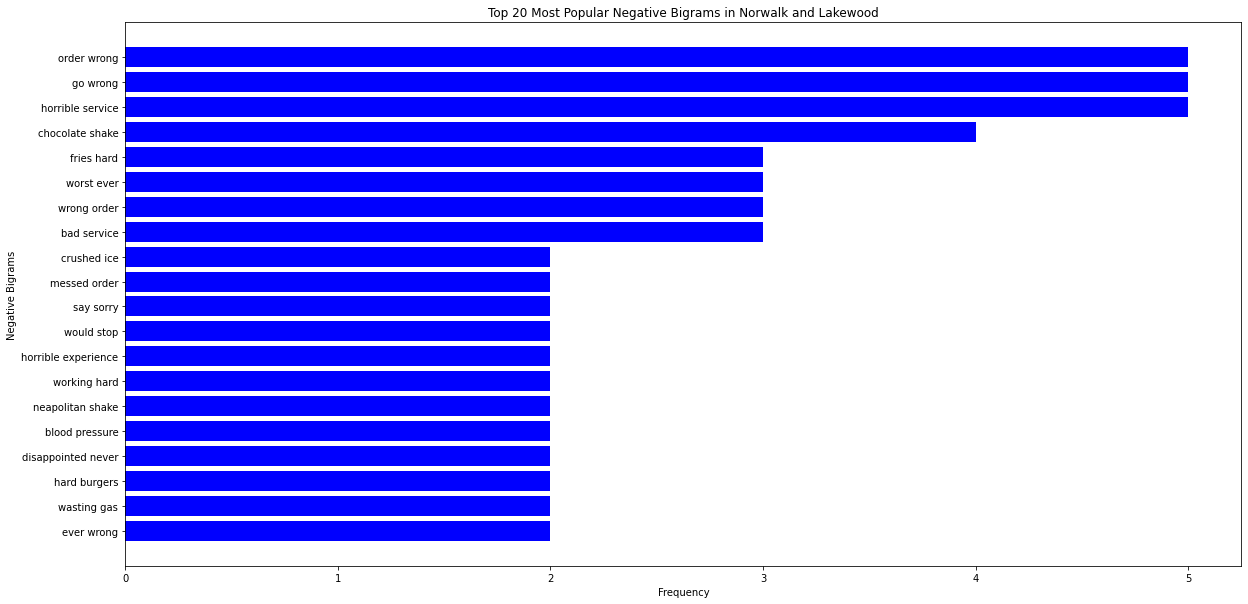

In [141]:
plt.figure(figsize=(20,10))
plt.barh(top_negative_bigrams['Bigram'], top_negative_bigrams['Count'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Negative Bigrams')
plt.title('Top 20 Most Popular Negative Bigrams in Norwalk and Lakewood')
plt.gca().invert_yaxis()
plt.show()

The bar chart displays the most frequently mentioned negative bigrams in reviews from locations with lower average ratings. The bigrams highlighted in the chart, such as "order wong," "horrible service," and "worst ever," provide valuable insights into the specific issues customers have encountered at these locations.

### Machine Learning Models
*This section utilizes machine learning models (Logistic Regression and Naive Bayes) to determine whether a review is positive or negative.*

   1. Prep the data for machine learning models by converting the text into a numerical format using CountVectorizer while excluding stop words.
   2. Split the dataset into 70% training and 30% testing, stratified to maintain class balance

In [173]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vect = CountVectorizer(max_features=300, stop_words=my_stop_words)
vect.fit(df_filtered.reviews)
X = vect.transform(df_filtered.reviews)
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

y = df_filtered.label
X = X_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

#### Logistic Regression
*This model is trained to predict whether a review is positive or negative*
* The coefficients extracted for each feature from the model and are sorted to identify which words have the highest positive or negative impact on predicting review sentiment.

In [174]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X_train, y_train)
y_pred_lg = log_reg.predict(X_test)

log_odds = log_reg.coef_[0]
coeff = pd.DataFrame(log_odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

In [175]:
coeff.head()

,coef
best,1.854950
thank,1.735677
great,1.688219
excellent,1.471492
stopped,1.408693


In [176]:
coeff.tail()

,coef
hair,-1.156555
used,-1.193902
decided,-1.443898
rude,-1.676657
worst,-1.768997


The top coefficients from the logistic regression model show positive words like "best," "great," and "excellent", which are likely associated with favorable reviews highlighting good food or service. In contrast, the bottom coefficients include negative words such as "hair," "rude," and "worst," which indicate dissatisfaction and negative experiences.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [179]:
lr_accuracy = accuracy_score(y_test, y_pred_lg)
lr_precision = precision_score(y_test, y_pred_lg)
lr_recall = recall_score(y_test, y_pred_lg)
lr_f1 = f1_score(y_test, y_pred_lg)

print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

Accuracy: 0.8422273781902552
Precision: 0.8921568627450981
Recall: 0.8863636363636364
F1 Score: 0.8892508143322475


#### Naive Bayes
*This classifier is well-suited for text classification tasks, as it assumes that the features follow a multinomial distribution.*

* This model is another approach to predict sentiment based on word frequency, comparing performance with logistic regression.

In [177]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
pred = nb_classifier.predict(X_test)

nb_accuracy = accuracy_score(y_test, pred)
nb_precision = precision_score(y_test, pred)
nb_recall = recall_score(y_test, pred)
nb_f1 = f1_score(y_test, pred)

print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)

#### Results
   1. **Accuracy**: The proportion of correct predictions.
   2. **Precision**: The proprotion of true positive predictions among all positive predictions.
   3. **Recall**: The proportion of true positives out of all actual positives.
   4. **F1 Score**: The harmonic mean of precision and recall
   
Given the imbalance in the dataset (with 1,019 positive and 406 negative samples), the F1 score is a more meaningful metric. It provides a balanced measure that accounts for both precision and recall, making it ideal for situations where both false positives and false negatives are important.

In [180]:
data = {'Accuracy': [lr_accuracy, nb_accuracy], 'Precision': [lr_precision, nb_precision], 'Recall': [lr_recall, nb_recall], 'F1': [lr_f1, nb_f1]}
index = ['Logistic Regression', 'Naive Bayes']

metric_df = pd.DataFrame(data, index=index)

In [181]:
metric_df

,Accuracy,Precision,Recall,F1
Logistic Regression,0.842227,0.892157,0.886364,0.889251
Naive Bayes,0.872390,0.920266,0.899351,0.909688


### Summary
This project demonstrated how sentiment analysis and machine learning can be applied to Yelp reviews to uncover insights about customer experiences across different locations. The analysis revealed how external factors, such as COVID-19, negatively impacted monthly sentiment. Additionally, machine learning models can be used to successfully predict whether a review was positive or negative, offering valuable predictive insights.